In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf


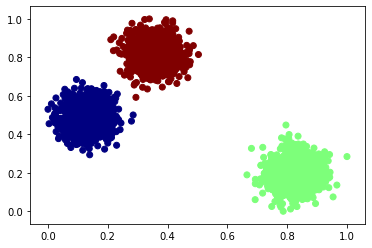

In [5]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

In [31]:
w = torch.randn((dims, cats), requires_grad = True)
b = torch.randn((1, cats), requires_grad = True)



opt = torch.optim.SGD([w, b], lr = 1e-1) 
loss_func = torch.nn.CrossEntropyLoss()

In [32]:
iterations = 200
eta = 1e-3
for i in range(iterations):
    y_hat = x @ w + b
    loss = loss_func(y_hat, y)
    loss.backward()
#    w -= eta * w.grad
#    b -= eta * b.grad
    opt.step() #does 1 iteration of grad descs
    opt.zero_grad() #zero_grad erases all the grad descs the roadmap to how u got to ur loss
    

In [33]:
y_hat = x @ w + b
p_hat = torch.argmax(y_hat, dim = 1)

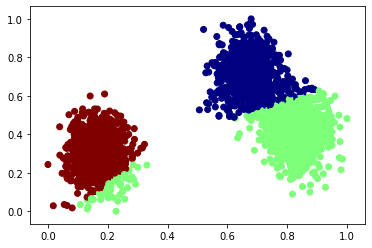

In [34]:
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')


## LAYER  ANN


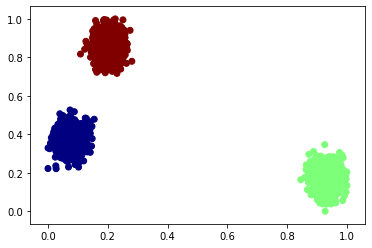

In [32]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

In [40]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid):
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        
    def Forward(self, x):
        #print(self.activation_func)
        return self.activation_func(x @ self.w + self.b)
        

In [41]:
#a = Layer(2,2)
#list(a.parameters())

In [42]:

model = Layer(dims, cats)

opt = torch.optim.Adam(model.parameters(), lr = 1e-1) 
#opt = torch.optim.Adam([w, b], lr=1e-2)

loss_func = torch.nn.CrossEntropyLoss()


In [43]:
y_hat = model.Forward(x)

In [44]:

iterations = 1000
for i in range(iterations):
    y_hat = model.Forward(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()


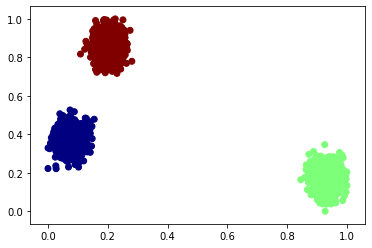

In [45]:
y_hat = model.Forward(x)
p_hat = torch.argmax(y_hat, dim = 1)
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')

## Three Layer

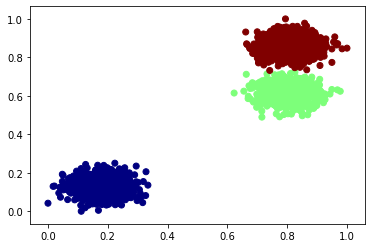

In [43]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

In [44]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid):
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        
    def Forward(self, x):
        return self.activation_func(x @ self.w + self.b)
        

In [45]:
#a = Layer(2,2)
#list(a.parameters())

In [46]:
class ThreeLayerANN(torch.nn.Module):
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        super(ThreeLayerANN, self).__init__()
        
        
        self.layer_0 = Layer(size_in, size_hidden_0)
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))

In [47]:
model = ThreeLayerANN(dims, 10, 5, cats)

opt = torch.optim.Adam(model.parameters(), lr = 1e-1) 
#opt = torch.optim.Adam([w, b], lr=1e-2)

loss_func = torch.nn.CrossEntropyLoss()


In [48]:

iterations = 1000
for i in range(iterations):
    y_hat = model.Forward(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()


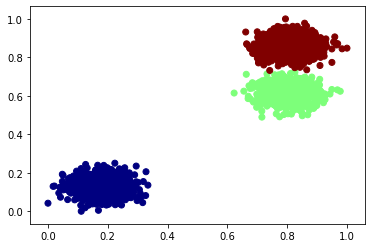

In [49]:
y_hat = model.Forward(x)
p_hat = torch.argmax(y_hat, dim = 1)
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')

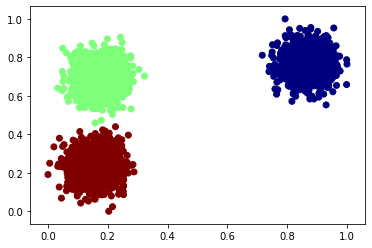

In [2]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

## L1/L2 Regularization


In [3]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid):
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        
    def Forward(self, x):
        return self.activation_func(x @ self.w + self.b)

class ThreeLayerANN(torch.nn.Module):
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        super(ThreeLayerANN, self).__init__()
        
        
        self.layer_0 = Layer(size_in, size_hidden_0)
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))    

In [4]:
model = ThreeLayerANN(dims, 10, 5, cats)

opt = torch.optim.Adam(model.parameters(), lr = 1e-1) 
#opt = torch.optim.Adam([w, b], lr=1e-2)

loss_func = torch.nn.CrossEntropyLoss()


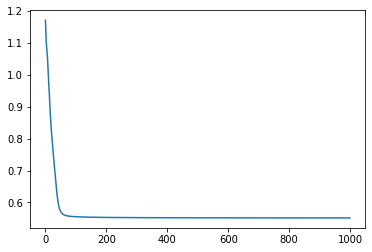

In [6]:
losses = []
lamb_1 = 0.5
lamb_2 = 0.5

iterations = 1000
for i in range(iterations):
    y_hat = model.Forward(x)
    loss = loss_func(y_hat, y)
    losses.append(loss.detach().numpy())
    for param in model.parameters():
        param = param - lamb_2 * param -lamb_1 * torch.sign(param)
    loss.backward()
    opt.step()
    opt.zero_grad()
    


plt.plot(losses)    
    

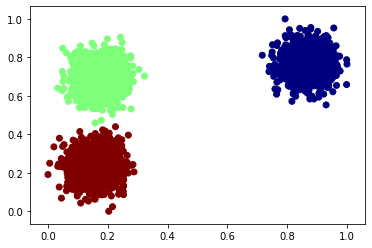

In [7]:
y_hat = model.Forward(x)
p_hat = torch.argmax(y_hat, dim = 1)
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')

## Dropout Regularization

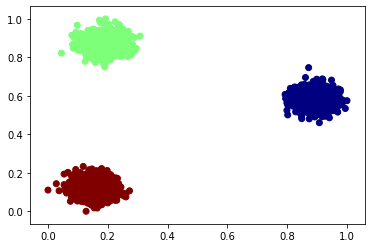

In [5]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

In [22]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid, dropout_rate =0):      
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        
        
    def Forward(self, x):
        #eturn self.activation_func(x @ self.w + self.b)
        z = self.activation_func(x @ self.w + self.b)
        mask = torch.randn(z.shape) > self.dropout_rate
        #mask = torch.type(mask, torch.float32)
        return z * mask
    
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    

class ThreeLayerANN(torch.nn.Module):
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        super(ThreeLayerANN, self).__init__()
        
        
        self.layer_0 = Layer(size_in, size_hidden_0,dropout_rate =0.7)
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))   
    
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    

In [23]:
model = ThreeLayerANN(dims, 10, 5, cats)

opt = torch.optim.Adam(model.parameters(), lr = 1e-1) 
#opt = torch.optim.Adam([w, b], lr=1e-2)

loss_func = torch.nn.CrossEntropyLoss()


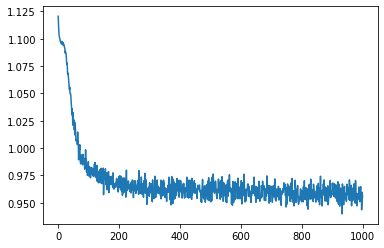

In [24]:
losses = []
lamb_1 = 0.5
lamb_2 = 0.5

iterations = 1000
for i in range(iterations):
    y_hat = model.Forward(x)
    loss = loss_func(y_hat, y)
    losses.append(loss.detach().numpy())
    for param in model.parameters():
        param = param - lamb_2 * param -lamb_1 * torch.sign(param)
    loss.backward()
    opt.step()
    opt.zero_grad()
    


plt.plot(losses)    
    

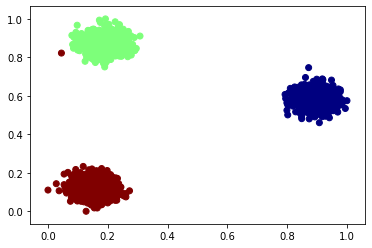

In [25]:
y_hat = model.Predict(x)
p_hat = torch.argmax(y_hat, dim = 1)
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')

## Noise Injection

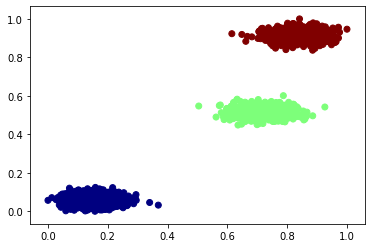

In [26]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(torch.randn(n, dims) + torch.randn(dims)*10)
    y.append(torch.ones(n)* i)
#   y.extend([i] * n)

x = torch.cat(x, dim = 0)
y = torch.cat(y, dim = 0).long()
#    y = torch.tensor(y)

x_max = torch.max(x, axis = 0).values
x_min = torch.min(x, axis = 0).values
    
    
x -=x_min
x /=x_max - x_min

plt.scatter(x[:,0], x[:,1], c=y, cmap ='jet' )

    

In [27]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid, dropout_rate =0, noise_rate = 0):      
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        self.noise_rate = noise_rate
        
        
    def Forward(self, x):
        #eturn self.activation_func(x @ self.w + self.b)
        z = self.activation_func(x @ self.w + self.b)
        noise = torch.randn (z.shape) * self.noise_rate
        mask  = torch.rand (z.shape) > self.dropout_rate  #mask should be between 0-1 so rand
        #mask = torch.type(mask, torch.float32)
        return (z + noise) * mask
    
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    

class ThreeLayerANN(torch.nn.Module):
    def __init__(self, size_in, size_hidden_0, size_hidden_1, size_out):
        super(ThreeLayerANN, self).__init__()
        
        
        self.layer_0 = Layer(size_in, size_hidden_0,dropout_rate =0.7, noise_rate = 0.5)
        self.layer_1 = Layer(size_hidden_0, size_hidden_1)
        self.layer_2 = Layer(size_hidden_1, size_out)
        
    def Forward(self, x):
        return self.layer_2.Forward(
        self.layer_1.Forward(
        self.layer_0.Forward(x)))   
    
    def Predict(self, x):
        return self.layer_2.Predict(
        self.layer_1.Predict(
        self.layer_0.Predict(x)))
    

In [28]:
model = ThreeLayerANN(dims, 10, 5, cats)

opt = torch.optim.Adam(model.parameters(), lr = 1e-1) 
#opt = torch.optim.Adam([w, b], lr=1e-2)

loss_func = torch.nn.CrossEntropyLoss()


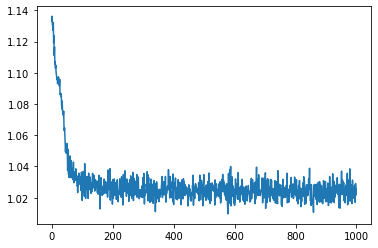

In [29]:
losses = []
lamb_1 = 0.5
lamb_2 = 0.5

iterations = 1000
for i in range(iterations):
    y_hat = model.Forward(x)
    loss = loss_func(y_hat, y)
    losses.append(loss.detach().numpy())
    for param in model.parameters():
        param = param - lamb_2 * param -lamb_1 * torch.sign(param)
    loss.backward()
    opt.step()
    opt.zero_grad()
    


plt.plot(losses)    
    

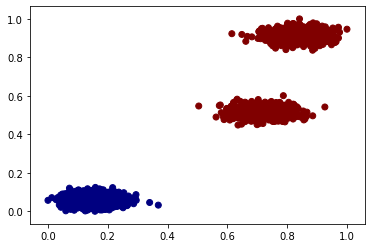

In [30]:
y_hat = model.Predict(x)
p_hat = torch.argmax(y_hat, dim = 1)
plt.scatter(x[:,0], x[:,1], c = p_hat, cmap = 'jet')

## preventing overfitting

## early stopping

## MultiLayer ANN

In [46]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid, dropout_rate =0, noise_rate = 0):      
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        self.dropout_rate = dropout_rate
        self.noise_rate = noise_rate
        
        
    def Forward(self, x):
        #eturn self.activation_func(x @ self.w + self.b)
        z = self.activation_func(x @ self.w + self.b)
        noise = torch.randn (z.shape) * self.noise_rate
        mask  = torch.rand (z.shape) > self.dropout_rate  #mask should be between 0-1 so rand
        #mask = torch.type(mask, torch.float32)
        return (z + noise) * mask
    
    
    def Predict(self, x):
        return self.activation_func(x @ self.w + self.b)
    
    
    

class MultiLayerANN(torch.nn.Module):
    def __init__(self, sizes):
        super(MultiLayerANN, self).__init__()
        
        self.layers = []
        for i in range(1, len(sizes)):
            new_layer = Layer(sizes[i-1], sizes[i])
            setattr(self, 'layer_{}'.format(i), new_layer)
            self.layers.append(new_layer)
        
        
    def Forward(self, x):
        z = x
        for layer in self.layers:
            z = layer.Forward(z)
        return z    

    
    
class MultiLayerBypassANN(torch.nn.Module):
    def __init__(self, size_in, sizes, num):
        super(MultiLayerBypassANN, self).__init__()
#         sizes = sizes[-1] * 2 + sizes
        
        self.layer_in = Layer(size_in, sizes[0])
        self.models   = []
        self.layers   = []
        
        for i in range(num):
            new_model = MultiLayerANN(sizes)
            setattr(self, 'model_{}'.format(i), new_model)
            self.layers.append(new_model)
            new_layer = Layer(sizes[-1] + sizes[0], sizes[0])
            setattr(self, 'layer_{}'.format(i), new_model)
            self.layers.append(new_layer)
            
        self.layer_out = Layer(sizes[0], size_out)
        self.num = num
        
        
    def Forward(self, x):
        z = self.layer_in.Forward(x)
        
        for i in range(self.num):   
            z_new = self.models[i].Forward(z)
            z = torch.cat([z, z_new], dim = 1)
            z = self.layers[i].Forward(z)
            
        z = self.layer_out.Forward(z)
        return z    
    
        

In [49]:
MultiLayerBypassANN(5, [1,2,3], 3, 4)

TypeError: __init__() takes 4 positional arguments but 5 were given